In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv("C:/Users/sofia/Downloads/Sales_add.csv")
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [3]:
# Renaming the columns
df.rename(columns={'Sales_before_digital_add(in $)':'sales_before','Sales_After_digital_add(in $)':'sales_after'},inplace=True)
df.columns

Index(['Month', 'Region', 'Manager', 'sales_before', 'sales_after'], dtype='object')

In [4]:
# Checking for null values
df.isnull().sum()

Month           0
Region          0
Manager         0
sales_before    0
sales_after     0
dtype: int64

### Whether there is any increase in sales after stepping into digital marketing

Here the hypotheses are

H0 : There is no increase in sales after stepping into digital marketing. 

H1 : There is significant increase in sales after stepping into digital marketing.

In [5]:
statistic,p_val=ttest_rel(df['sales_after'],df['sales_before'],alternative='greater')
print('t score=',statistic,'\np value=',p_val,'\n')

alpha  = 0.05       # Significance level
if p_val>=alpha:
    print("We fail to reject H0 based on the sample.\nThere is no increase in sales after stepping into digital marketing.")
else:
    print("There is enough evidence to reject H0 based on the sample.\nThe sales has increased significantly after using digital marketing.")

t score= 12.09070525287017 
p value= 3.168333502287889e-11 

There is enough evidence to reject H0 based on the sample.
The sales has increased significantly after using digital marketing.


Text(0.5, 1.0, 'Sales before and after using digital marketing')

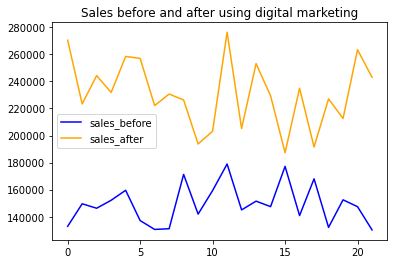

In [6]:
data=df[['sales_before','sales_after']]
data.plot(kind='line',color=['blue','orange'])
plt.title('Sales before and after using digital marketing')

### Whether there is any dependency between the features Region and Manager.

In [7]:
data1=pd.crosstab(df['Region'],df['Manager'])
data1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


The hypotheses here are

H0= There is no relationship between Region and Manager

H1= There is a relationship between Region and Manager

In [8]:
statistic,p_val,df,exp = chi2_contingency(data1)
print('Chi squared statistic=',statistic,'\n\np value=',p_val,'\n\ndegrees of freedom=',df,'\n\nExpected values:',exp)

Chi squared statistic= 3.050566893424036 

p value= 0.5493991051158094 

degrees of freedom= 4 

Expected values: [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [9]:
alpha  = 0.05             # Significance level

if p_val>=alpha:
    print("We fail to reject H0 based on the sample.\nThere is no significant relationship between region and manager.")
else:
    print("There is enough evidence to reject H0 based on the sample.\nThere is some relationship between region and manager.")

We fail to reject H0 based on the sample.
There is no significant relationship between region and manager.
